In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(42)
tf.random.set_seed(42) #시드값 고정
data = fetch_california_housing()
in_data = StandardScaler().fit_transform(data.data)
x_data,tt_x,y_data,tt_y = train_test_split(in_data,data.target,random_state=42)
#x_data,tt_x,y_data,tt_y = train_test_split(data.data,data.target,random_state=42)
t_x,v_x,t_y,v_y = train_test_split(x_data,y_data,random_state=42,test_size=0.2)
# s = StandardScaler()
# t_x = s.fit_transform(t_x)
# v_x = s.fit_transform(v_x)
# tt_x = s.fit_transform(tt_x)
print(t_x.shape)
print(t_x.shape[1:]) #입력 data의 차원의 형상

(12384, 8)
(8,)


In [2]:
m = keras.models.Sequential()
m.add(keras.layers.Flatten(input_shape=t_x.shape[1:]))
m.add(keras.layers.Dense(30,activation='relu'))
m.add(keras.layers.Dense(1))
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [3]:
m.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='mean_squared_error', metrics='accuracy')
hy = m.fit(t_x,t_y,validation_data=(v_x,v_y),epochs=20)
t_hy = m.evaluate(tt_x,tt_y)

Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 1.6898 - accuracy: 0.0030 - val_loss: 0.7729 - val_accuracy: 0.0032
Epoch 2/20
387/387 [==============================] - 1s 1ms/step - loss: 0.7301 - accuracy: 0.0033 - val_loss: 0.6413 - val_accuracy: 0.0032
Epoch 3/20
387/387 [==============================] - 1s 1ms/step - loss: 0.6545 - accuracy: 0.0033 - val_loss: 0.6017 - val_accuracy: 0.0032
Epoch 4/20
387/387 [==============================] - 1s 1ms/step - loss: 0.6216 - accuracy: 0.0033 - val_loss: 0.5712 - val_accuracy: 0.0032
Epoch 5/20
387/387 [==============================] - 1s 1ms/step - loss: 0.5947 - accuracy: 0.0033 - val_loss: 0.5476 - val_accuracy: 0.0032
Epoch 6/20
387/387 [==============================] - 1s 1ms/step - loss: 0.5733 - accuracy: 0.0033 - val_loss: 0.5300 - val_accuracy: 0.0032
Epoch 7/20
387/387 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.0033 - val_loss: 0.5146 - val_accuracy: 0.0032
Epoch 

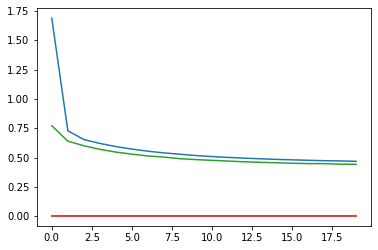

In [7]:
plt.plot(pd.DataFrame(hy.history))

In [8]:
tt_x[:3]

array([[-1.15248922, -0.2891866 , -0.49989596, -0.15697642, -0.02956174,
         0.07768129,  0.20044873,  0.27936569],
       [-0.70501534,  0.10810379, -0.1574771 ,  0.20430076,  0.12320645,
        -0.03763415, -0.23028292,  0.05475686],
       [-0.20558796,  1.85618152, -0.5868143 ,  0.1882305 , -0.1019721 ,
        -0.164679  ,  1.01509336, -1.43265267]])

In [9]:
tt_y[:3]

array([0.477  , 0.458  , 5.00001])

In [10]:
m.predict(tt_x[:3])

array([[0.54340786],
       [1.6062403 ],
       [2.8592422 ]], dtype=float32)